In [1]:
import bs4
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
r = requests.get("https://www.imdb.com/chart/top/")
print(r)

<Response [403]>


In [3]:
import requests
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; Firefox 27)'}
response = requests.get("https://www.imdb.com/chart/top/", headers=headers)
print(response)
print(response.content)

<Response [200]>
b'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1695970588324);\n        }\n    })</script><title>IMDb Top 250 Movies</title><meta name="description" content="IMDb Top 250 as rated by regular IMDb voters" data-id="main"/><meta property="og:site_name" content="IMDb"/><meta property="og:title" content="IMDb Top 2

In [4]:
soup = BeautifulSoup(response.text,"html")
print(soup)

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1695970588324);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="IMDb Top 250 as rated by regular IMDb voters" data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="IMDb Top 250 Movies" property="og:title"/><meta content="IMDb Top 250 as rated b

In [5]:
print(soup.title)
print(soup.title.name)
print(soup.title.parent.name)

<title>IMDb Top 250 Movies</title>
title
head


In [6]:
soup.find("ul")

<ul aria-orientation="vertical" class="ipc-list navlinkcat__list ipc-list--baseAlt" role="menu"><a aria-disabled="false" class="ipc-list__item nav-link sc-jIRcFI kOHUKn ipc-list__item--indent-one" href="https://www.imdb.com/calendar/?ref_=nv_mv_cal" role="menuitem" tabindex="-1"><span class="ipc-list-item__text" role="presentation">Release Calendar</span></a><a aria-disabled="false" class="ipc-list__item nav-link sc-jIRcFI kOHUKn ipc-list__item--indent-one" href="/chart/top/?ref_=nv_mv_250" role="menuitem" tabindex="-1"><span class="ipc-list-item__text" role="presentation">Top 250 Movies</span></a><a aria-disabled="false" class="ipc-list__item nav-link sc-jIRcFI kOHUKn ipc-list__item--indent-one" href="/chart/moviemeter/?ref_=nv_mv_mpm" role="menuitem" tabindex="-1"><span class="ipc-list-item__text" role="presentation">Most Popular Movies</span></a><a aria-disabled="false" class="ipc-list__item nav-link sc-jIRcFI kOHUKn ipc-list__item--indent-one" href="/feature/genre/?ref_=nv_ch_gr" r

In [7]:
soup.find("class = ipc-metadata-list ipc-metadata-list--dividers-between sc-3f13560f-0 sTTRj compact-list-view ipc-metadata-list--base")


In [8]:
Movies = soup.find("ul", class_="ipc-metadata-list ipc-metadata-list--dividers-between sc-3f13560f-0 sTTRj compact-list-view ipc-metadata-list--base" ).find_all("li")
print(Movies)


[<li class="ipc-metadata-list-summary-item sc-59b6048d-0 jemTre cli-parent"><div class="sc-f8c44fe8-0 leyYCk cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 3

In [9]:
for movie in Movies:
    print(movie)
    break

<li class="ipc-metadata-list-summary-item sc-59b6048d-0 jemTre cli-parent"><div class="sc-f8c44fe8-0 leyYCk cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34

In [10]:
from openpyxl import Workbook

# Create a new workbook
wb = openpyxl.Workbook()

# Create a new worksheet
ws = wb.active

ws.title = "Movie_Lists"

ws.append(['Rank', 'Movie_Name', 'Year', 'Duration', 'Rating', 'viewer_count', 'MPA_Rating'])

# Add the data to the worksheet
for movie in Movies:
    movie_rank,movie_name = movie.find("div", class_="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-4dcdad14-9 dZscOy cli-title").a.text.strip().split(".",1)
    movie_rank = int(movie_rank)
    movie_rating, movie_viewer = [part.strip(')') for part in movie.find("span", class_="ipc-rating-star--base").text.strip().split('(')]
    three_data = movie.find_all("span", class_="sc-4dcdad14-8 cvucyi cli-title-metadata-item")
    if len(three_data) == 3:
        year, run_time, rating = [sp.text for sp in three_data]
    else:
        year = "Unknown"
        run_time = "Unknown"
        rating = "Unknown"
    print(movie_rank,"\t", movie_name,"\t",movie_viewer,"\t", movie_rating,"\t",year,"\t",run_time,"\t",rating)
        
    ws.append([movie_rank, movie_name, year, run_time, rating, movie_viewer, movie_rating])
wb.save("Movie_Lists.xlsx")

1 	  The Shawshank Redemption 	 2.8M 	 9.3  	 1994 	 2h 22m 	 A
2 	  The Godfather 	 2M 	 9.2  	 1972 	 2h 55m 	 A
3 	  The Dark Knight 	 2.8M 	 9.0  	 2008 	 2h 32m 	 UA
4 	  The Godfather: Part II 	 1.3M 	 9.0  	 1974 	 3h 22m 	 A
5 	  12 Angry Men 	 833K 	 9.0  	 1957 	 1h 36m 	 U
6 	  Schindler's List 	 1.4M 	 9.0  	 1993 	 3h 15m 	 A
7 	  The Lord of the Rings: The Return of the King 	 1.9M 	 9.0  	 2003 	 3h 21m 	 U
8 	  Pulp Fiction 	 2.1M 	 8.9  	 1994 	 2h 34m 	 A
9 	  The Lord of the Rings: The Fellowship of the Ring 	 1.9M 	 8.8  	 2001 	 2h 58m 	 U
10 	  Il Buono, Il Brutto, Il Cattivo 	 790K 	 8.8  	 1966 	 2h 41m 	 A
11 	  Forrest Gump 	 2.2M 	 8.8  	 1994 	 2h 22m 	 UA
12 	  Fight Club 	 2.2M 	 8.8  	 1999 	 2h 19m 	 A
13 	  The Lord of the Rings: The Two Towers 	 1.7M 	 8.8  	 2002 	 2h 59m 	 UA
14 	  Inception 	 2.5M 	 8.8  	 2010 	 2h 28m 	 UA
15 	  Star Wars: Episode V - The Empire Strikes Back 	 1.3M 	 8.7  	 1980 	 2h 4m 	 UA
16 	  The Matrix 	 2M 	 8.7  	 1999 	 2

146 	  A Beautiful Mind 	 964K 	 8.2  	 2001 	 2h 15m 	 UA
147 	  The Treasure of the Sierra Madre 	 130K 	 8.2  	 1948 	 2h 6m 	 Passed
148 	  Yôjinbô 	 128K 	 8.2  	 1961 	 1h 50m 	 U
149 	  No Country for Old Men 	 1M 	 8.2  	 2007 	 2h 2m 	 18
150 	  Kill Bill: Vol. 1 	 1.2M 	 8.2  	 2003 	 1h 51m 	 A
151 	  Monty Python and the Holy Grail 	 559K 	 8.2  	 1975 	 1h 31m 	 U
152 	  The Great Escape 	 253K 	 8.2  	 1963 	 2h 52m 	 U
153 	  The Thing 	 448K 	 8.2  	 1982 	 1h 49m 	 A
154 	  Rashōmon 	 176K 	 8.2  	 1950 	 1h 28m 	 U
155 	  Finding Nemo 	 1.1M 	 8.2  	 2003 	 1h 40m 	 U
156 	  The Elephant Man 	 252K 	 8.2  	 1980 	 2h 4m 	 UA
157 	  Chinatown 	 340K 	 8.2  	 1974 	 2h 10m 	 UA
158 	  Hauru No Ugoku Shiro 	 425K 	 8.2  	 2004 	 1h 59m 	 U
159 	  Dial M for Murder 	 184K 	 8.2  	 1954 	 1h 45m 	 A
160 	  Gone with the Wind 	 327K 	 8.2  	 1939 	 3h 58m 	 U
161 	  V for Vendetta 	 1.2M 	 8.2  	 2005 	 2h 12m 	 UA
162 	  Raging Bull 	 369K 	 8.1  	 1980 	 2h 9m 	 A
163 	  

In [19]:
df = pd.read_excel("Movie_Lists.xlsx")
df

Rank                 Movie_Name  Year Duration     Rating viewer_count  \
0       1   The Shawshank Redemption  1994   2h 22m          A         2.8M   
1       2              The Godfather  1972   2h 55m          A           2M   
2       3            The Dark Knight  2008   2h 32m         UA         2.8M   
3       4     The Godfather: Part II  1974   3h 22m          A         1.3M   
4       5               12 Angry Men  1957   1h 36m          U         833K   
..    ...                        ...   ...      ...        ...          ...   
245   246              The 400 Blows  1959   1h 39m          U         124K   
246   247                    Persona  1966   1h 25m  Not Rated         127K   
247   248              Life of Brian  1979   1h 34m          R         415K   
248   249                    Aladdin  1992   1h 30m          U         449K   
249   250                   Drishyam  2015   2h 43m         UA          91K   

    MPA_Rating  
0         9.3   
1         9.2   
2         9.0   
3         9.0   
4         9.0   
..         ...  
245       8.1   
246       8.1   
247       8.0   
248       8.0   
249       8.2   

[250 rows x 7 columns]

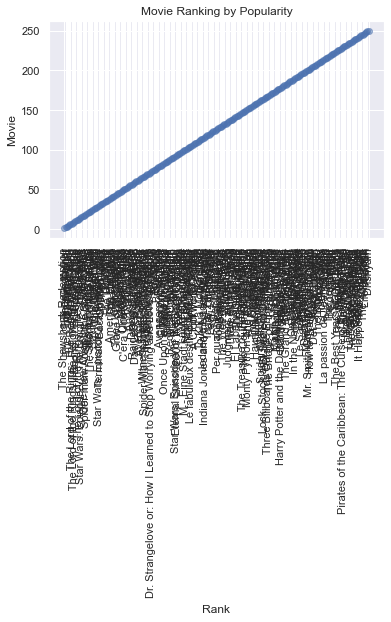

In [27]:
plt.scatter(df['Movie_Name'], df['Rank'], alpha=0.5)
plt.xticks(rotation = 90)
plt.title("Movie Ranking by Popularity")
plt.xlabel("Rank")
plt.ylabel("Movie")
plt.show()

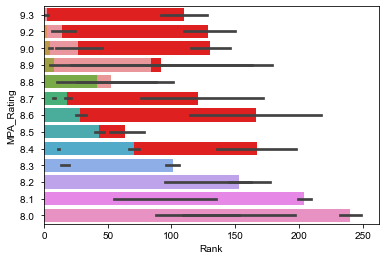

In [24]:
sns.barplot(x=df['Rank'], y=df['Movie_Name'], color='blue')
sns.barplot(x=df['Rank'], y=df['Rating'], color='red')
sns.barplot(x=df['Rank'], y=df['viewer_count'])
sns.barplot(x=df['Rank'], y=df['MPA_Rating'])
sns.set(style="darkgrid")
plt.show()

In [12]:
df.columns

Index(['Rank', 'Movie_Name', 'Year', 'Duration', 'Rating', 'viewer_count',
       'MPA_Rating'],
      dtype='object')